<a href="https://colab.research.google.com/github/AbhayMudgal/BTP/blob/main/BTP_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image, ImageOps
from PIL import Image
import numpy as np

%matplotlib inline 
plt.rcParams["figure.figsize"] = (10,10)
import PIL

In [ ]:
def B(delE):
  deE = -delE * 200
  if deE < -5:
    deE = 0
  if deE > 1:
    deE = 1
  U = math.exp(deE)
  return min(U, 1)

def E( X, Y, W, H):
  pi = np.pi
  ans = 0
  for i in range(-4, 5):
    ans += ( np.sin(2*pi*Y) / ( np.cosh(2*pi*(X - (i*W/H))) - np.cos(2* pi *Y)))
  
  return ans

def En(so, x, y, W, H):
  E_prime = 0
  for A in so:
    a = A[0]
    b = A[1]

    ax = (a - x) / W
    bx = (b - y) / H
    
    E_prime += E(ax, bx, W, H)
  
  return E_prime 

#def randomize(array, loc_set, sol_loc):


In [ ]:
#entering parameters and calculating the number of solute atoms.

conc = float (input("Enter percentage concentration of solute: "))
k = 1.38
#T  = float (input("Enter Temperature: "))
#vs = float (input("Enter Volume of Solute: "))
#va = float (input("Enter Volume of Atom: "))

Mr = float (input("Enter mobility ratio: "))
#delv = sub(vs, va)


Enter percentage concentration of solute: 1
Enter mobility ratio: 0.09


In [ ]:
k = 1.38

In [ ]:
T  = float (input("Enter Temperature: "))

Enter Temperature: 1200


In [ ]:
W = int (input("Enter Width of the simulation cell: "))
H = int (input("Enter Height of the simulation cell: "))


Enter Width of the simulation cell: 100
Enter Height of the simulation cell: 100


In [ ]:
#initializing array  and randomly distributing solutes in the matrix

array = np.zeros((W, H), int)

sol_loc = []
loc_set = set()
sol = (H*W*conc)/100
a = 0
R = sol*Mr

while (a < sol):
  for i in range(W):
    for j in range(H):
      num = random.randint(0, 100)
      
      if (num==100) and (array[i][j] == 0):
        array[i][j] = 1
        sol_loc.append([i, j])
        loc_set.add((i, j))
        a = a+1    
      
      if (a==sol): 
        break
    
    if (a==sol): 
      break 

x_dis = int (W/2)
y_dis = int (H/2)


array[x_dis][y_dis] = -1
loc_set.add((x_dis, y_dis))

In [ ]:
print(len(sol_loc))
print(len(loc_set))

100
101


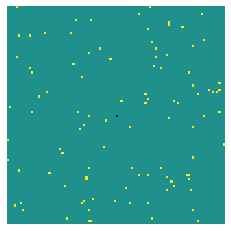

In [ ]:
#projecting the array as image

plt.grid(False)
plt.axis('off')

image = plt.imshow(array, interpolation='nearest')

plt.show()

In [ ]:
#randomly selecting a solute atom.

iter = int (input("Enter Number of Iterations: "))
vel = []
k = 0
for i in range (0, iter):
  n = random.randint(0, R)
  
  if n == 0:
    x_dis_new = (x_dis + 1) % W
    dE = En(sol_loc, x_dis_new, y_dis, W, H) - En(sol_loc, x_dis, y_dis, W, H)

    bd = B(dE)
    n = random.random()
    if n < bd:
      if (x_dis_new, y_dis) not in loc_set:
        loc_set.remove((x_dis, y_dis))
        loc_set.add((x_dis_new, y_dis))
        array[x_dis][y_dis] = 0
        array[x_dis_new][y_dis] = -1
      else:  
        sol_loc.remove([x_dis_new, y_dis])
        sol_loc.append([x_dis, y_dis])
        array[x_dis][y_dis] = 1
        array[x_dis_new][y_dis] = -1

      x_dis = x_dis_new
      k = k+1
    #if x_dis==0:
      #randomize(array, loc_set, sol_loc) 

  else:
    n = random.randint(0, sol-1)
    x = sol_loc[n][0]
    y = sol_loc[n][1]
  
    for i in range(4):
      xi = x
      yi = y
    
      if (i==0):
        xi = (x - 1) % W
      elif (i==1):
        yi = (y - 1) % H
      elif (i==2):
        xi = (x + 1) % W
      else:
        yi = (y + 1) % H
      
      if ((xi, yi) not in loc_set):
        
        X = (x - x_dis) / W
        Y = (y - y_dis) / H
        Xi = (xi - x_dis) / W
        Yi = (yi - y_dis) / H
        

        delE = E(Xi, Yi, W, H) - E(X, Y, W, H)
        n = random.random()

        if delE*k*T*200 < 0 or n>0.8:
          array[x][y] = 0
          array[xi][yi] = 1

          loc_set.remove((x, y))
          loc_set.add((xi, yi))
          sol_loc.append([xi, yi])
          sol_loc.remove([x, y])
          
          break

  if np.log10()    



Enter Number of Iterations: 100


In [ ]:
print(k)

13


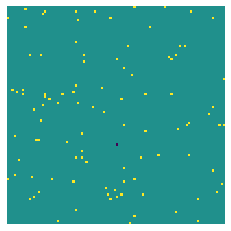

In [ ]:
plt.grid(False)
plt.axis('off')

image = plt.imshow(array, interpolation='nearest')

plt.show()


In [ ]:
iter = int (input("Enter Number of Iterations: "))

for i in range(iter):
    n = random.randint(0, sol-1)
    x = sol_loc[n][0]
    y = sol_loc[n][1]
  
    for i in range(4):
      xi = x
      yi = y
    
      if (i==0):
        xi = (x - 1) % W
      elif (i==1):
        yi = (y - 1) % H
      elif (i==2):
        xi = (x + 1) % W
      else:
        yi = (y + 1) % H
      
      if ((xi, yi) not in loc_set):
        
        X = (x - x_dis) / W
        Y = (y - y_dis) / H
        Xi = (xi - x_dis) / W
        Yi = (yi - y_dis) / H
        

        delE = E(Xi, Yi, W, H) - E(X, Y, W, H)
        n = random.random()

        if delE*k*T*200 < 0 or n>0.8:
          array[x][y] = 0
          array[xi][yi] = 1

          loc_set.remove((x, y))
          loc_set.add((xi, yi))
          sol_loc.append([xi, yi])
          sol_loc.remove([x, y])
          
          break


Enter Number of Iterations: 50000


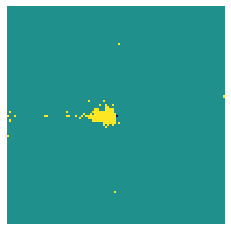

In [ ]:
#projecting the array as image

plt.grid(False)
plt.axis('off')

image = plt.imshow(array, interpolation='nearest')

plt.show()

In [ ]:
for i in range(10):
  print(random.randint(0, 1))

1
1
0
1
0
0
0
0
1
1
